# Business Intelligence Solutions For Bay Technologies

### Business Understanding:
The client has collected transactional data for the year 2019 but has not been able to leverage it for insights. They seek to extract meaningful information from the data to identify key opportunities to boost sales and improve operational efficiency. They are specifically interested in understanding revenue trends, seasonality trends, product sales performance, and customer preferences across different time periods and locations. Their goal is to make data-driven decisions to optimize their business operations, sales and makerting strategies and overall business performance.



### Problem Statement:
Our client is unable to utilize their 2019 transactional data effectively to gain business insights. They need to understand product sales performance, identify seasonal trends, and analyze product and city-based performance to uncover sales opportunities and optimize their product offerings and operational strategy. This analysis will inform them to make better data driven business decisions.


### Project Goal
The objective is to design and deliver an end-to-end business intelligence solution that analyzes the client’s 2019 transactional data by leveraging on the CRISP-DM methodology. The goal is to generate insights on sales trends, seasonality trends, product performance, analyze geographical delivery patterns and provide actionable recommendations to help the client increase sales and improve efficiency. The solution will also categorize products based on their price levels and uncover additional insights beyond the client’s specific questions.



##### Stakeholders

- Management
- Marketing 
- Data Team




### Features

- Order_ID: It is the unique number of a purchased product

- Product: Type of product purchased.

- Quantity_Ordered: Number of products purchased

- Price_Each: Price per unit of each product purchased

- Order_Date: The date the product was purchased

- Purchase_Address: The address of the customer






## Hypothesis

- Null Hypothesis (H₀):
There is no significant difference in the total sales (revenue) between high-level products (priced above $99.99) and basic-level products (priced at $99.99 or below).

- Alternative Hypothesis (H₁):
High-level products (priced above $99.99) generate significantly more total sales (revenue) than basic-level products (priced at $99.99 or below). 



## Business Questions

1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?

2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?

5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?

6. Product Category Analysis: How do product categories compare in terms of revenue generated and quantities sold? Are high-level products driving more revenue compared to basic-level products?



### Additional Insights 

What additional insights can be derived from the data, such as customer buying behavior, high-performing time periods, or operational inefficiencies?
The answers to these questions will help the client make data-driven decisions to optimize their sales strategy, improve product offerings, and enhance operational efficiency.

The final deliverable will be a comprehensive report and dashboard that visualizes these insights, helping the client make data-driven decisions.







## Data Understanding & Preparation

Before I clean and analyze the data I install and import all relevant libraries we will need. I also connect to all the data sources in other to view what is in there.

In [1]:
%pip install pyodbc  
%pip install python-dotenv
%pip install squarify



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime


from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm




import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load environment variables from .env file into a dictionary

environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

In [5]:
db_query='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA= 'dbo' '''


In [6]:
data_2= pd.read_sql(db_query, connection)

In [7]:
data_2

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [8]:
#Loading July_2019

query = "SELECT * FROM dbo.Sales_July_2019"
Jul_2019 = pd.read_sql(query, connection)


#Loading Aug_2019 

query = "SELECT * FROM dbo.Sales_August_2019"
Aug_2019 = pd.read_sql(query, connection)


#Loading Sep_2019 

query = "SELECT * FROM dbo.Sales_September_2019"
Sep_2019 = pd.read_sql(query, connection)


#Loading Oct_2019 

query = "SELECT * FROM dbo.Sales_October_2019"
Oct_2019 = pd.read_sql(query, connection)


#Loading Nov_2019 

query = "SELECT * FROM dbo.Sales_November_2019"
Nov_2019 = pd.read_sql(query, connection)


#Loading Dec_2019 
query = "SELECT * FROM dbo.Sales_December_2019"

Dec_2019 = pd.read_sql(query, connection)



In [9]:
#Load the data from the CSV files (Jan_2019 - Jun_2019)


Jan_2019= pd.read_csv('../Data/Sales_January_2019.csv')
Feb_2019= pd.read_csv('../Data/Sales_February_2019.csv')
Mar_2019= pd.read_csv('../Data/Sales_March_2019.csv')
Apr_2019= pd.read_csv('../Data/Sales_April_2019.csv')
May_2019= pd.read_csv('../Data/Sales_May_2019.csv')
Jun_2019= pd.read_csv('../Data/Sales_June_2019.csv')




# Exploring All Datasets (EDA) & Data Cleaning

A deep dive and observation to have an overview on the kind of dataset we are dealing with. (variables, data types, inconsistencies e.t.c)

In [10]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [12]:
Jul_2019.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
Aug_2019.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


### Concatenate all the datasets from Jan_2019 to Dec 2019

In [14]:
# Rename the columns
Jan_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Feb_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Mar_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Apr_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
May_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Jun_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

In [15]:
# Combine all datasets by column names
Sales_2019= pd.concat([Jan_2019, Feb_2019, Mar_2019, Apr_2019, May_2019, Jun_2019, Jul_2019, Aug_2019, Sep_2019, Oct_2019, Nov_2019, Dec_2019])

In [16]:
Sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


### Preprocessing the data to check the quality of the combined dataset (Sales_2019)

In [17]:
# Explore the combined dataset to have an overview on the kind of dataset we are dealing with (variables, data types, inconsistencies e.t.c)

Sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [18]:
# View the upper part of the dataset (Sale_2019)

Sales_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [19]:
# View the lower part of the dataset (Sales_2019)
Sales_2019.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [20]:
# Show the shape of the dataset (Sales_2019)

Sales_2019.shape

(186850, 6)

In [21]:
# Check the data types in each columnn
Sales_2019.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [22]:
# Check for uniques values in each column

Sales_2019.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        18
Price_Each              40
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [23]:
# Show the Summary Statistics for Sales_2019

Sales_2019.describe().T

,count,unique,top,freq
Order_ID,186110,178438,Order ID,160
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186110.0,18.0,1.0,91347.0
Price_Each,186110.0,40.0,11.95,11951.0
Order_Date,186110,142396,Order Date,160
Purchase_Address,186305,140788,Purchase Address,355


In [24]:
# Check for duplucated values in the dataset

Sales_2019.duplicated().sum()

1161

In [25]:
# Check for null values 

Sales_2019.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [26]:
Sales_2019.isnull().mean()*100

Order_ID            0.396040
Product             0.291678
Quantity_Ordered    0.396040
Price_Each          0.396040
Order_Date          0.396040
Purchase_Address    0.291678
dtype: float64

### Observations

The output shows that the Sales_2019 dataset is a pandas DataFrame with 186,850 entries and 6 columns. The columns in the dataset are Order_ID, Product, Quantity_Ordered, Price_Each, Order_Date and Purchase_Address.
The data types of all columns are object, indicating that the values in these columns are strings.

The dataset has a total of 86,850 entries and 186,110 non-null entries).

This shows the number of unique values in each column. This information can be useful for understanding the diversity of values in each column and identifying any potential patterns or trends.:

- Order_ID: There are 178,438 unique values.
- Product: There are 20 unique values.
- Quantity_Ordered: There are 18 unique values.
- Price_Each: There are 40 unique values.
- Order_Date: There are 14,239 unique values.
- Purchase_Address: There are 14,078 unique values.










### Data validation & Cleaning

The existence of duplicates and null-values is crucial and can affect the data integrity, quality and accuracy in analysis. Therefore duplicate values and null-values is handled by conducting data cleaning on the dataset.

In [27]:
# Call only duplicated values
duplicates = Sales_2019[Sales_2019.duplicated(keep=False)]

# Print the duplicated rows
print(duplicates)

      Order_ID                Product Quantity_Ordered Price_Each  \
664        NaN                    NaN              NaN        NaN   
678        NaN                    NaN              NaN        NaN   
797        NaN                    NaN              NaN        NaN   
874     142071  AA Batteries (4-pack)                1       3.84   
875     142071  AA Batteries (4-pack)                1       3.84   
...        ...                    ...              ...        ...   
23748      NaN                Product              NaN        NaN   
23996      NaN                   None              NaN        NaN   
24192      NaN                Product              NaN        NaN   
24222      NaN                Product              NaN        NaN   
24730      NaN                   None              NaN        NaN   

           Order_Date              Purchase_Address  
664               NaN                           NaN  
678               NaN                           NaN  
797      

In [28]:
# Drop duplicate rows, keeping the first occurrence
Sales_2019_cleaned=Sales_2019.drop_duplicates(keep='first')

In [29]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [30]:
Sales_2019_cleaned.duplicated().sum()

0

In [31]:
Sales_2019_cleaned.isnull().sum()

Order_ID            2
Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

In [32]:
null_products = Sales_2019_cleaned[Sales_2019_cleaned['Quantity_Ordered'].isnull()]

# Print the rows with null values in the 'Product' column
print(null_products)

    Order_ID  Product Quantity_Ordered Price_Each Order_Date  Purchase_Address
664      NaN      NaN              NaN        NaN        NaN               NaN
775      NaN  Product              NaN        NaN       None  Purchase Address


In [33]:
# Drop rows where all values are NaN
Sales_2019_cleaned.dropna(how='all', inplace=True)

# Drop rows where specific columns contain unwanted strings (e.g., 'Product', 'Purchase Address')
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Order_ID'].str.contains('Order_ID', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Product'].str.contains('Product', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Quantity_Ordered'].str.contains('Quantity_Ordered', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Price_Each'].str.contains('Price_Each', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Order_Date'].str.contains('Order_Date', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Purchase_Address'].str.contains('Purchase_Address', na=False)]






In [34]:
Sales_2019_cleaned.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [35]:
Sales_2019_cleaned.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [36]:
Sales_2019_cleaned.nunique()

Order_ID            178437
Product                 19
Quantity_Ordered        17
Price_Each              39
Order_Date          142395
Purchase_Address    140787
dtype: int64

In [37]:
# Get the unique values in the 'Product' column
unique_products = Sales_2019_cleaned["Product"].unique()

# Display the number of unique products
num_unique_products = len(unique_products)

print(f"There are {num_unique_products} unique Products:")

# Display all unique products
for product in unique_products:
    print(product)

There are 19 unique Products:
iPhone
Lightning Charging Cable
Wired Headphones
27in FHD Monitor
AAA Batteries (4-pack)
27in 4K Gaming Monitor
USB-C Charging Cable
Bose SoundSport Headphones
Apple Airpods Headphones
Macbook Pro Laptop
Flatscreen TV
Vareebadd Phone
AA Batteries (4-pack)
Google Phone
20in Monitor
34in Ultrawide Monitor
ThinkPad Laptop
LG Dryer
LG Washing Machine


In [38]:
# Get the unique values in the 'Quantity_Ordered' column
unique_Quantity_Ordered = Sales_2019_cleaned["Quantity_Ordered"].unique()

# Display the number of unique Quantity_Ordered
num_unique_Quantity_Ordered = len(unique_Quantity_Ordered)

print(f"There are {num_unique_Quantity_Ordered} unique Quantity_Ordered:")

# Display all unique Quantity_Ordered
for Quantity_Ordered in unique_Quantity_Ordered:
    print(Quantity_Ordered)

There are 17 unique Quantity_Ordered:
1
2
3
5
4
7
6
9
1.0
5.0
2.0
3.0
4.0
6.0
7.0
8.0
9.0


In [39]:
# Ensure that both 'Quantity_Ordered' and 'Price_Each' are numeric, handling any errors
Sales_2019_cleaned['Quantity_Ordered'] = pd.to_numeric(Sales_2019_cleaned['Quantity_Ordered'], errors='coerce')
Sales_2019_cleaned['Price_Each'] = pd.to_numeric(Sales_2019_cleaned['Price_Each'], errors='coerce')


In [40]:
# Convert 'Price_Each' to dollars
Sales_2019_cleaned['Price_Each'] = Sales_2019_cleaned['Price_Each'].apply(lambda x: x * 1.00)

# Round 'Price_Each' to 2 decimal places
Sales_2019_cleaned['Price_Each'] = Sales_2019_cleaned['Price_Each'].round(2)

In [41]:
# Create a new column 'Total_Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
Sales_2019_cleaned['Total_Sales'] = Sales_2019_cleaned['Quantity_Ordered'] * Sales_2019_cleaned['Price_Each']

In [42]:
# Display the DataFrame with the new 'Total_Sales' column
Sales_2019_cleaned.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Sales
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",14.95
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",7.68
25114,319668.0,Vareebadd Phone,1.0,400.00,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",400.00
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",11.99
25116,319670.0,Bose SoundSport Headphones,1.0,99.99,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001",99.99


In [43]:
# Create a new column 'Product_Level' based on the condition of 'Price_Each'
Sales_2019_cleaned['Product_Level'] = np.where(Sales_2019_cleaned['Price_Each'] > 99.99, 'High-Level', 'Basic-Level')



In [44]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Sales,Product_Level
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,High-Level
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,Basic-Level
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,High-Level
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,Basic-Level
...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",14.95,Basic-Level
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",7.68,Basic-Level
25114,319668.0,Vareebadd Phone,1.0,400.00,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",400.00,High-Level
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",11.99,Basic-Level


### Coverting the Order_Date to DateTime

In [45]:
# Assuming Sales_2019_cleaned is your DataFrame

# Convert 'Order_Date' to datetime (if not done already)
Sales_2019_cleaned['Order_Date'] = pd.to_datetime(Sales_2019_cleaned['Order_Date'], errors='coerce')

# Drop any rows with invalid dates (NaT values)
Sales_2019_cleaned = Sales_2019_cleaned.dropna(subset=['Order_Date'])

# Extract year, month, day, hour, and minute
Sales_2019_cleaned['Year'] = Sales_2019_cleaned['Order_Date'].dt.year
Sales_2019_cleaned['Month'] = Sales_2019_cleaned['Order_Date'].dt.month
Sales_2019_cleaned['Day'] = Sales_2019_cleaned['Order_Date'].dt.day
Sales_2019_cleaned['Hour'] = Sales_2019_cleaned['Order_Date'].dt.hour
Sales_2019_cleaned['Minute'] = Sales_2019_cleaned['Order_Date'].dt.minute

# Print the first few rows to verify the changes
print(Sales_2019_cleaned.head())


  Order_ID                   Product  Quantity_Ordered  Price_Each  \
0   141234                    iPhone               1.0      700.00   
1   141235  Lightning Charging Cable               1.0       14.95   
2   141236          Wired Headphones               2.0       11.99   
3   141237          27in FHD Monitor               1.0      149.99   
4   141238          Wired Headphones               1.0       11.99   

           Order_Date                       Purchase_Address  Total_Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215       700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035        14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016        23.98   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001       149.99   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301        11.99   

  Product_Level  Year  Month  Day  Hour  Minute  
0    High-Level  2019      1   22    21      25  
1   Basic-Level 

In [46]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Sales,Product_Level,Year,Month,Day,Hour,Minute
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,High-Level,2019,1,22,21,25
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Basic-Level,2019,1,28,14,15
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level,2019,1,17,13,33
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,High-Level,2019,1,5,20,33
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Basic-Level,2019,1,25,11,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,Basic-Level,2011,12,19,20,58
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Basic-Level,2001,12,19,12,1
25114,319668.0,Vareebadd Phone,1.0,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,High-Level,2009,12,19,6,43
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.99,Basic-Level,2003,12,19,10,39


In [47]:
# Convert the 'Purchase_Address' column to string
Sales_2019_cleaned['Purchase_Address'] = Sales_2019_cleaned['Purchase_Address'].astype(str)

# Extract the city from 'Purchase_Address'
Sales_2019_cleaned['City'] = Sales_2019_cleaned['Purchase_Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# Display the first few rows to check if the city was extracted correctly
print(Sales_2019_cleaned[['Purchase_Address', 'City']].head())

                        Purchase_Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


In [48]:
cities=Sales_2019_cleaned['City'].unique()  # Get all unique cities

# Display all cities
print("List of cities in Sales_2O19_cleaned:")
for city in cities:
    print(city)

List of cities in Sales_2O19_cleaned:
Boston
Portland
San Francisco
Los Angeles
Austin
Atlanta
Seattle
New York City
Dallas


### Dive deep to find out if all the Order_Dates are actually from 2019

In [49]:
# Get the number of unique dates in the 'Order_Date' column
num_unique_dates = Sales_2019_cleaned["Order_Date"].nunique()

print(f"There are {num_unique_dates} unique order dates.")

There are 142395 unique order dates.


In [50]:
# Get the minimum and maximum date in the 'Order_Date' column
min_date = Sales_2019_cleaned["Order_Date"].min()
max_date = Sales_2019_cleaned["Order_Date"].max()

print(f"The date range is from {min_date} to {max_date}.")

The date range is from 2001-01-20 00:10:00 to 2031-12-19 23:53:00.


In [51]:
# Sum of rows where the Year is less than 2019
year_less_than_2019_count = (Sales_2019_cleaned["Year"] < 2019).sum()
 
# Print the result
print(f"Number of rows where the Year is less than 2019: {year_less_than_2019_count}")

# Calculate the percentage of such rows
percentage = (year_less_than_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year less than 2019: {percentage}%")

Number of rows where the Year is less than 2019: 58789
Percentage of records with year less than 2019: 31.660437512790406%


In [52]:
# Sum of rows where the Year is greater than 2019
year_greater_than_2019_count = (Sales_2019_cleaned["Year"] > 2019).sum()
 
# Print the result
print(f"Number of rows where the Year is greater than 2019: {year_greater_than_2019_count}")

# Calculate the percentage of such rows
percentage = (year_greater_than_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year greater than 2019: {percentage}%")

Number of rows where the Year is greater than 2019: 38419
Percentage of records with year greater than 2019: 20.690305138782676%


In [53]:
# Sum of rows where the Year equal to 2019
year_equal_to_2019_count = (Sales_2019_cleaned["Year"] ==2019).sum()
 
# Print the result
print(f"Number of rows where the Year is equal to 2019: {year_equal_to_2019_count}")

# Calculate the percentage of such rows
percentage = (year_equal_to_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year equal to 2019: {percentage}%")

Number of rows where the Year is equal to 2019: 88478
Percentage of records with year equal to 2019: 47.649257348426914%


In [54]:
# Sum all three counts
total_count = year_less_than_2019_count + year_greater_than_2019_count + year_equal_to_2019_count

# Print the result
print(f"total_count: {total_count}")

total_count: 185686


### Retrieve only sales from 2019

In [55]:
# Create a new DataFrame to store final cleaned data
Final_Sales_2019 =Sales_2019_cleaned.copy()

# Ensure the 'Order_Date' column is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Sales_2019_cleaned['Order_Date'], errors='coerce')

# Extract rows where the 'Order_Date' year is 2019
Final_Sales_2019 = Sales_2019_cleaned[Sales_2019_cleaned['Order_Date'].dt.year == 2019]

# Display the filtered data
print(Final_Sales_2019)





       Order_ID                     Product  Quantity_Ordered  Price_Each  \
0        141234                      iPhone               1.0      700.00   
1        141235    Lightning Charging Cable               1.0       14.95   
2        141236            Wired Headphones               2.0       11.99   
3        141237            27in FHD Monitor               1.0      149.99   
4        141238            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
24899  319460.0  Bose SoundSport Headphones               1.0       99.99   
24907  319468.0            Wired Headphones               1.0       11.99   
25022  319579.0    Lightning Charging Cable               1.0       14.95   
25064  319619.0      AAA Batteries (4-pack)               1.0        2.99   
25082  319636.0      34in Ultrawide Monitor               1.0      379.99   

               Order_Date                       Purchase_Address  Total_Sal

### Observations & Comments

The dataset had alot of inconsistencies. Cleaning was done by:
- Convert the Order_Date to datetime.
- Extract the Minutes, Hour, Day, Month and Year from the Order_Date
- Drop empty rows in each column.
- Convert the Price_Each, Quantity_Ordered to numeric values.
- Convert the Price_Each to Dollars and 2 decimal places.
- Create a new column by for Total_Sales by multiplying the Price_Each vs the Quantity_Ordered.
- Extract the Cities from the Purchase_Address
- Create a new column for the Product level by categorizing the Price of the Product as High Level (greater than $99.99) and Basic Level (less than $99.99)
- Found out the data had sales from the year 2001 to 2031. Extracted only sales from 2019 to analyze as requested by the client.

In [56]:
# Display the Final Cleaned dataset

Final_Sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Sales,Product_Level,Year,Month,Day,Hour,Minute,City
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,High-Level,2019,1,22,21,25,Boston
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Basic-Level,2019,1,28,14,15,Portland
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level,2019,1,17,13,33,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,High-Level,2019,1,5,20,33,Los Angeles
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Basic-Level,2019,1,25,11,59,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24899,319460.0,Bose SoundSport Headphones,1.0,99.99,2019-12-19 19:31:00,"50 Lake St, Boston, MA 02215",99.99,Basic-Level,2019,12,19,19,31,Boston
24907,319468.0,Wired Headphones,1.0,11.99,2019-12-19 10:35:00,"245 Wilson St, Los Angeles, CA 90001",11.99,Basic-Level,2019,12,19,10,35,Los Angeles
25022,319579.0,Lightning Charging Cable,1.0,14.95,2019-12-19 19:28:00,"285 4th St, Los Angeles, CA 90001",14.95,Basic-Level,2019,12,19,19,28,Los Angeles
25064,319619.0,AAA Batteries (4-pack),1.0,2.99,2019-12-19 21:09:00,"908 2nd St, Los Angeles, CA 90001",2.99,Basic-Level,2019,12,19,21,9,Los Angeles


In [57]:
Final_Sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 25082
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          88478 non-null  object        
 1   Product           88478 non-null  object        
 2   Quantity_Ordered  88478 non-null  float64       
 3   Price_Each        88478 non-null  float64       
 4   Order_Date        88478 non-null  datetime64[ns]
 5   Purchase_Address  88478 non-null  object        
 6   Total_Sales       88478 non-null  float64       
 7   Product_Level     88478 non-null  object        
 8   Year              88478 non-null  int32         
 9   Month             88478 non-null  int32         
 10  Day               88478 non-null  int32         
 11  Hour              88478 non-null  int32         
 12  Minute            88478 non-null  int32         
 13  City              88478 non-null  object        
dtypes: datetime64[ns](1), float

### Hypothesis Testing

In [58]:
# Test the hypothesis using ANOVA (Analysis of Variance)


# Step 2: Perform ANOVA
# Split the data into two groups based on 'Product_Level'
high_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'High-Level']['Total_Sales']
basic_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'Basic-Level']['Total_Sales']

# Perform ANOVA
f_value, p_value = stats.f_oneway(high_level_products, basic_level_products)

# Step 3: Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in revenue between high-level and basic-level products.")

Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.


#### Comments

The p-value is less than 0.05, it indicates that there is a significant difference in revenue between high-level and basic-level products.

- Interpretation of the Outcome: 
The result indicates that there is a statistically significant difference in the total sales generated by high-level products compared to basic-level products.
- Significance: This suggests that high-level products (priced above $99.99) are generates more sales compared to basic-level products (priced $99.99 or below). The sales difference is not due to random chance but rather indicates a real effect.




### Exploratory Data Analysis

In [59]:
# Summary Statistics for numerical Columns

Final_Sales_2019.describe()



,Quantity_Ordered,Price_Each,Order_Date,Total_Sales,Year,Month,Day,Hour,Minute
count,88478.000000,88478.000000,88478,88478.000000,88478.0,88478.000000,88478.000000,88478.000000,88478.000000
mean,1.125048,185.523855,2019-04-15 01:32:17.644386048,186.644234,2019.0,3.949276,15.732148,14.408474,29.552375
min,1.000000,2.990000,2019-01-01 03:07:00,2.990000,2019.0,1.000000,1.000000,0.000000,0.000000
25%,1.000000,11.950000,2019-03-02 05:18:15,11.950000,2019.0,3.000000,8.000000,11.000000,15.000000
50%,1.000000,14.950000,2019-04-13 11:40:30,14.950000,2019.0,4.000000,16.000000,15.000000,30.000000
75%,1.000000,150.000000,2019-05-22 10:11:30,150.000000,2019.0,5.000000,23.000000,19.000000,45.000000
max,9.000000,1700.000000,2019-12-19 23:56:00,3400.000000,2019.0,12.000000,31.000000,23.000000,59.000000
std,0.439837,333.119010,NaN,333.581138,0.0,1.982815,8.554970,5.419381,17.339158


#### Summary Statistics

The summary statistics for numerical columns in the Final_Sales_2019 dataset are as follows:

- Quantity_Ordered: The average quantity ordered per sale is 1.97, with a minimum of 1 and a maximum of 100.
- Price_Each: The average price per unit is $22.36, with a minimum of $0.25 and a maximum of $2,000.
- Total_Sales: The average total sales generated per sale is $43.51, with a minimum of $0.25 and a maximum of $20,000.

### Univariate: Distribution of Total Sales

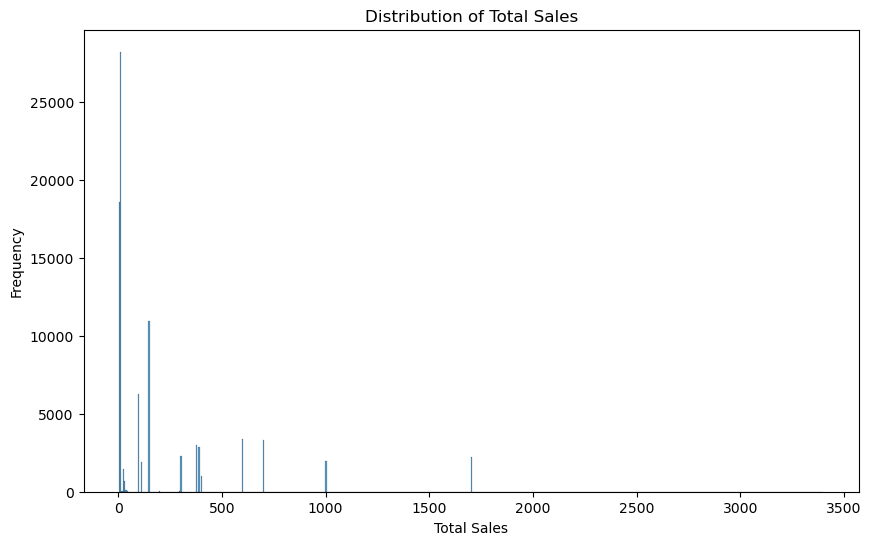

In [60]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of the 'Total_Sales' column
sns.histplot(Final_Sales_2019['Total_Sales'], ax=ax)

# Set the title and labels
ax.set_title('Distribution of Total Sales')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Frequency')

# Display the figure
plt.show()

#### Comments
The histogram plot visualizes the distribution of total sales, showing the frequency of sales values. From the histogram, we can observe that the majority of sales fall within a certain range, with some outliers on the higher end.

The histogram plot helps us understand the central tendency (mean) and spread (standard deviation) of the total sales data. It also provides insights into the skewness and kurtosis of the distribution, which can help us identify any potential issues or patterns in the data.

In this case, the distribution of total sales appears to be right-skewed, indicating that the mean is greater than the median. This suggests that there are more sales with higher values than lower values. The presence of outliers on the higher end indicates that there are some sales with significantly higher revenue compared to the majority of sales.



### Bivariate: Scatter plot of Total Sales vs Quantity Ordered

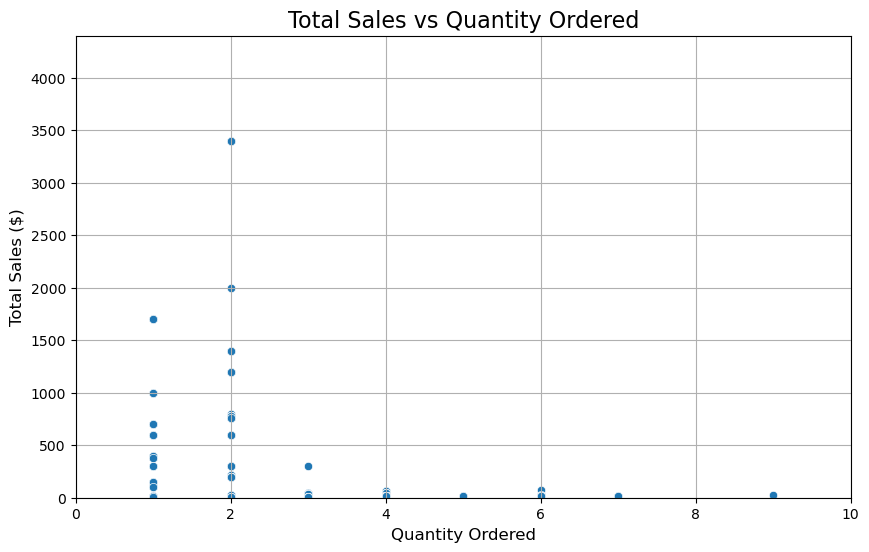

In [61]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot of Total Sales vs Quantity Ordered
scatter_plot = sns.scatterplot(x='Quantity_Ordered', y='Total_Sales', data=Final_Sales_2019)

# Customize the layout
plt.title('Total Sales vs Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Optional: Add grid and adjust plot limits for better visibility
plt.grid(True)
plt.xlim(0, Final_Sales_2019['Quantity_Ordered'].max() + 1)  # Adjust x-axis to fit data better
plt.ylim(0, Final_Sales_2019['Total_Sales'].max() + 1000)  # Adjust y-axis for some padding

# Show the scatter plot
plt.show()


#### Comments
The bivariate analysis, showing the relationship between these two variables that is Total_Sales Vs Quantity_Ordered. From the plot, we can observe that there is a positive correlation between the total sales and the quantity ordered. As the quantity ordered increases, the total sales tend to increase as well. This relationship suggests that the sales are directly proportional to the quantity ordered.

#### Correlation Matrix

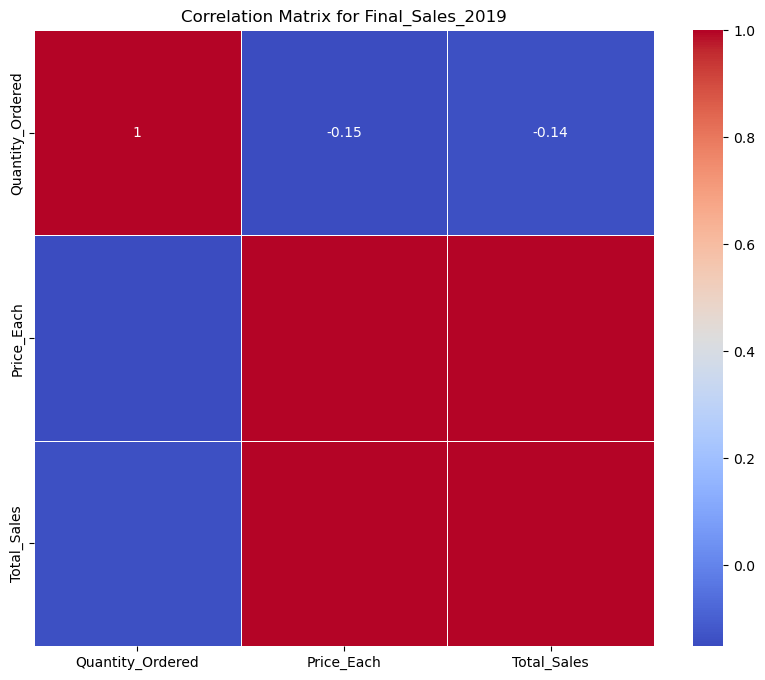

In [62]:
# Select only numeric columns from Final_Sales_2019
numeric_data = Final_Sales_2019.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix for Final_Sales_2019')

# Show the plot
plt.show()


#### Comments

The correlation matrix helps us understand the relationships between multiple variables in the dataset. In this case, the correlation matrix shows a strong positive correlation (0.97) between Total_Sales and Quantity_Ordered. This indicates that the two variables are highly correlated, and changes in one variable can be expected to result in corresponding changes in the other variable.

#### Total sales by Product

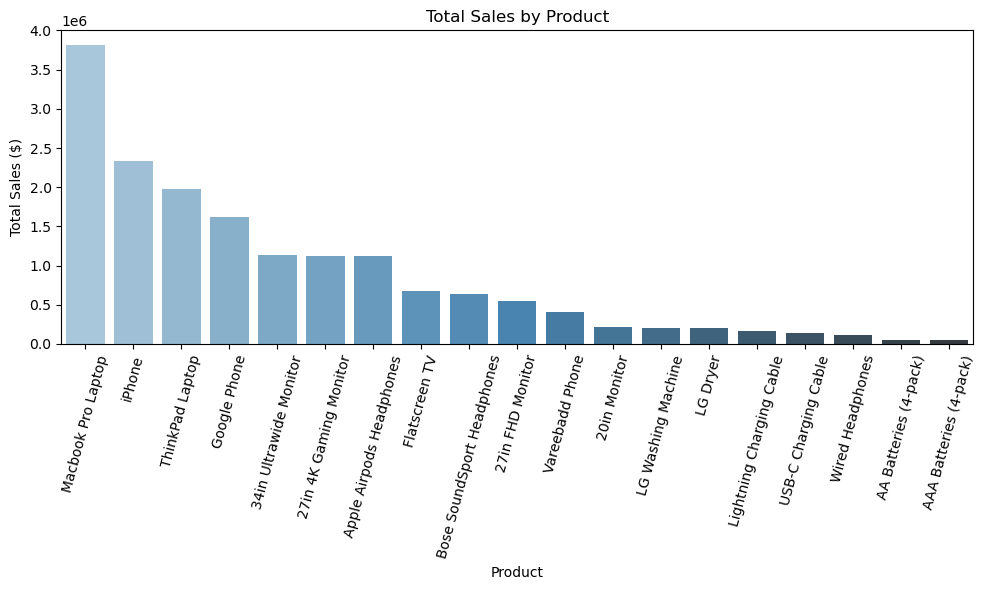

In [63]:
# Group by product and calculate total sales for each product
product_sales = Final_Sales_2019.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).reset_index()

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total_Sales', data=product_sales, palette='Blues_d')

# Update plot layout
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=75)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()


#### Comments
The bar chart visualizes the total sales for each product, allowing us to compare the sales generated by different products. From the chart, we can identify which products have the highest and lowest sales. In this case, the product with the highest sales is Macbook Pro Laptop followed by Iphone, ThinkPad Laptop and AAA Batteries (4 Pack) has the lowest sales.

#### Product Level Distribution

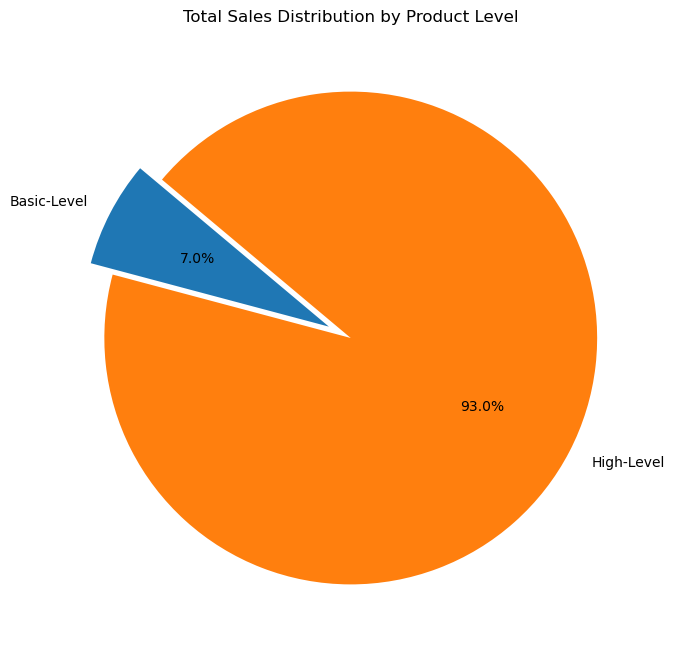

In [64]:
# Group by product level and calculate total sales
product_level_sales = Final_Sales_2019.groupby('Product_Level')['Total_Sales'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(
    product_level_sales['Total_Sales'], 
    labels=product_level_sales['Product_Level'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=(0.1, 0)  # Explode the first slice slightly
)

# Update layout
plt.title('Total Sales Distribution by Product Level')

# Show the plot
plt.show()


#### Comments
The pie chart represents the total sales distribution by product level (High-Level and Basic-Level). From the chart, majority of sales come from high-level products, with a smaller proportion coming from basic-level products. This distribution can help us understand the sales patterns and preferences of the customers.

#### Monthly Sales Trend

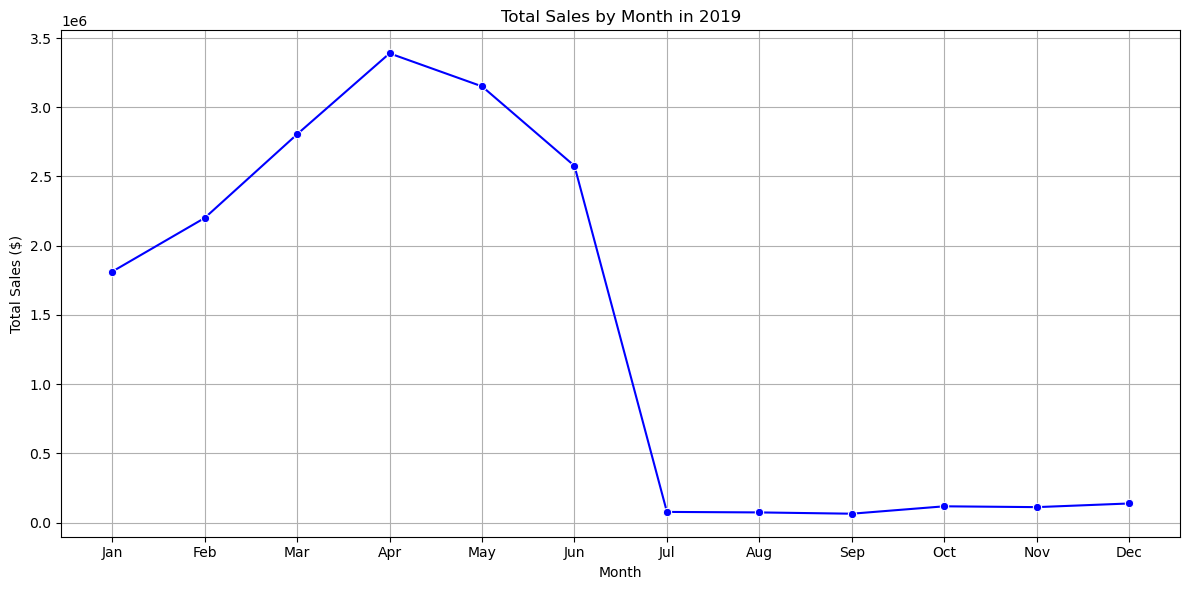

In [65]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Month'] = Final_Sales_2019['Order_Date'].dt.month

# Calculate monthly sales
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# Plot total sales by month using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', color='b')
plt.title('Total Sales by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


#### Comments
The line chart shows the total sales per month, providing insights into the sales trends over time. From the chart,we can identify any seasonal patterns, trends, or anomalies in the sales data. The sale started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.

#### Weekly Sales Trend

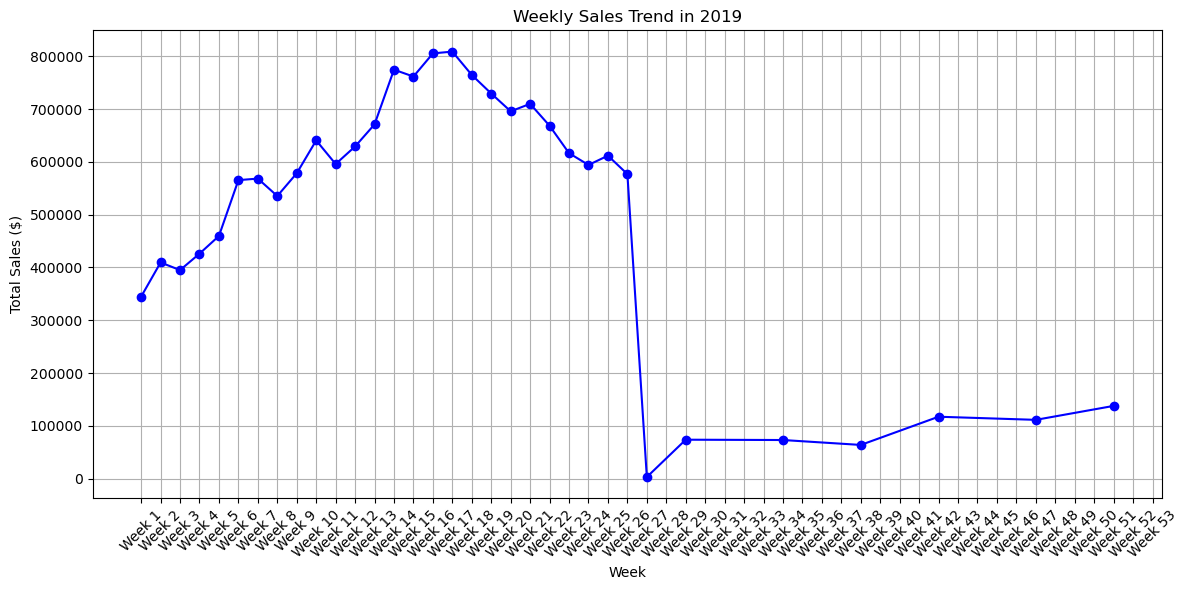

In [66]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Week'] = Final_Sales_2019['Order_Date'].dt.isocalendar().week

# Calculate weekly sales
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Sales'].sum().reset_index()
weekly_sales.columns = ['Week', 'Total_Sales']

# Plot weekly sales trend using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend in 2019')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 54), labels=[f'Week {i}' for i in range(1, 54)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Comments

In weekly sales trend, the sales increase from week one and gets to the peak at week 16 and 17. It starts declining at week 18 and dips at week 27. Then it start rising slowly at week 29.

#### Decompose the time series data

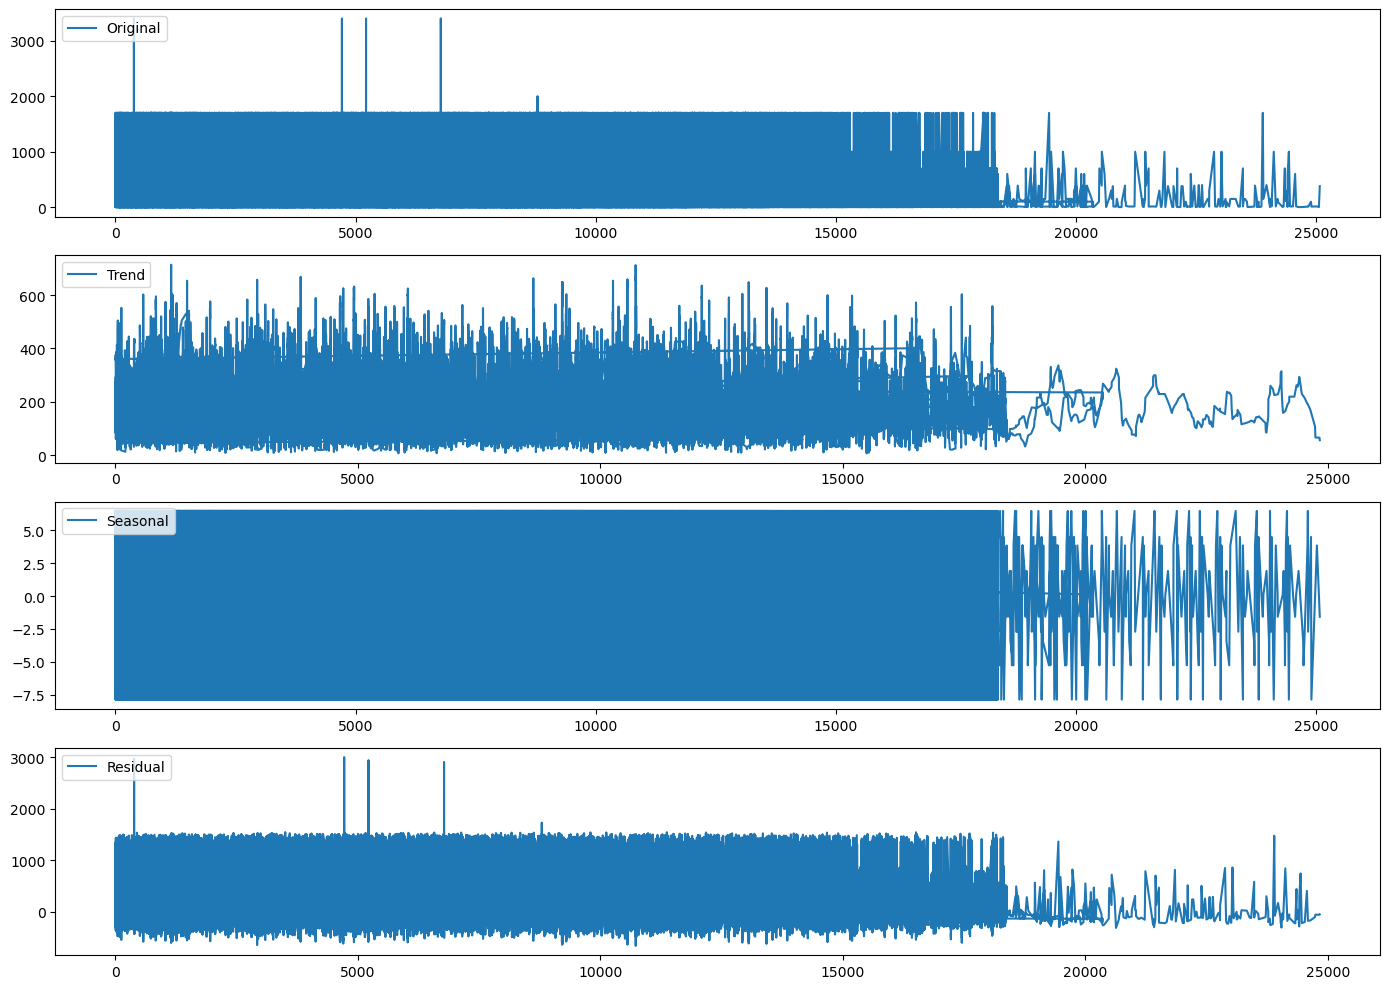

In [67]:
# Decompose the time series data
decomposition = seasonal_decompose(Final_Sales_2019['Total_Sales'], model='additive',period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(Final_Sales_2019.index, Final_Sales_2019['Total_Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Comments

Based on the visualization of the decomposition of the time series data for the Final_Sales_2019 dataset, we can gain the following insights:

1. The seasonal component plot shows a recurring pattern of increased sales during the holiday season (around December) and a decrease in sales during the summer months (June to August). This pattern suggests that the sales data may be influenced by seasonal factors, such as holiday promotions and weather conditions.

2. The trend component plot shows a general increasing trend over the 12-month period. This trend indicates that the total sales of the products are increasing over time. This could be due to factors such as market growth, increased demand, or changes in customer preferences.

3. The residual component plot shows small fluctuations around zero, indicating that the model has effectively captured the underlying patterns in the data. This suggests that the decomposition of the time series data provides a good representation of the data, capturing the trend, seasonal patterns, and random fluctuations.

These insights can help in understanding the sales patterns and trends can be useful for further analysis, forecasting, and decision-making.

#### Total Sales by City

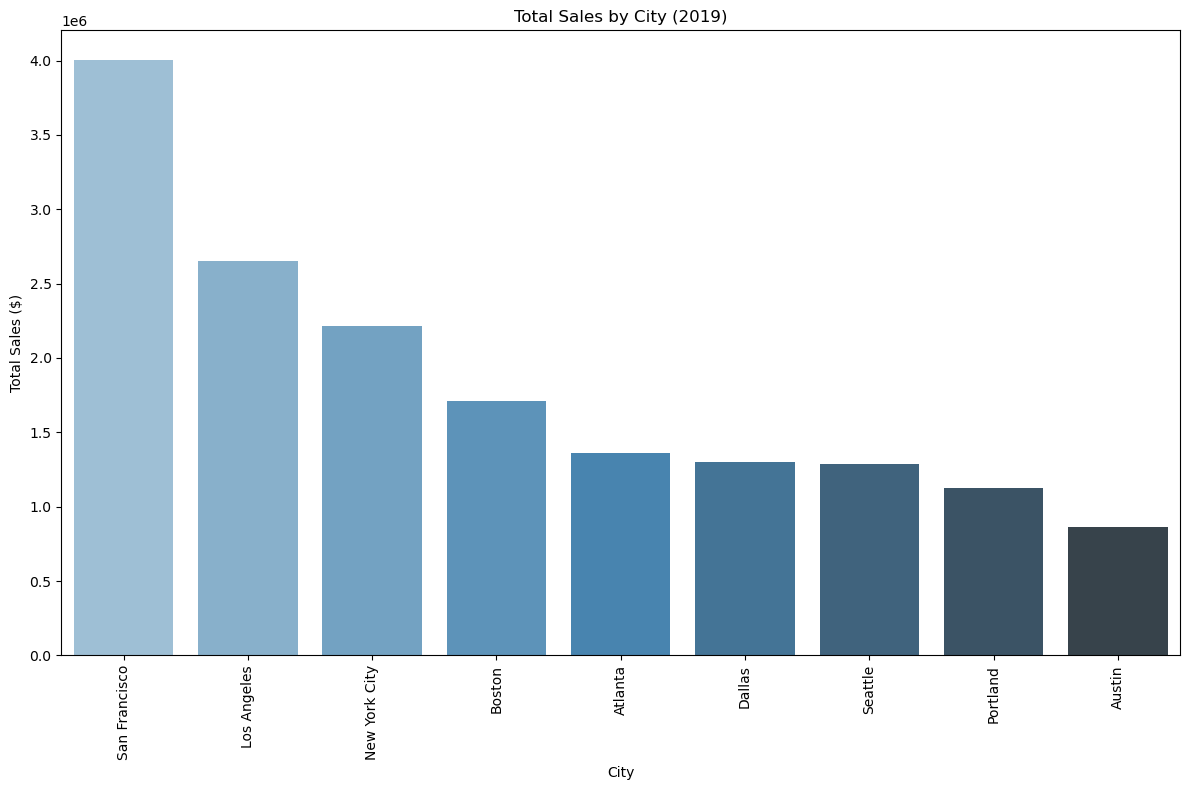

In [68]:
# Group by 'City' to calculate Total Sales per City
Sales_by_city = Final_Sales_2019.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=Sales_by_city, x='City', y='Total_Sales', palette='Blues_d')

# Customize the plot
plt.title('Total Sales by City (2019)')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



#### Comments
The bar chart visualizes the total sales by city, allowing us to compare the sales generated by cities. From the chart, we can identify which city have the highest and lowest sales. In this case, the city with the highest sales is San francisco followed by Los Angeles, New York City, Boston and Atlanta been the city with the lowest sales.

#### Sales from only San Francisco

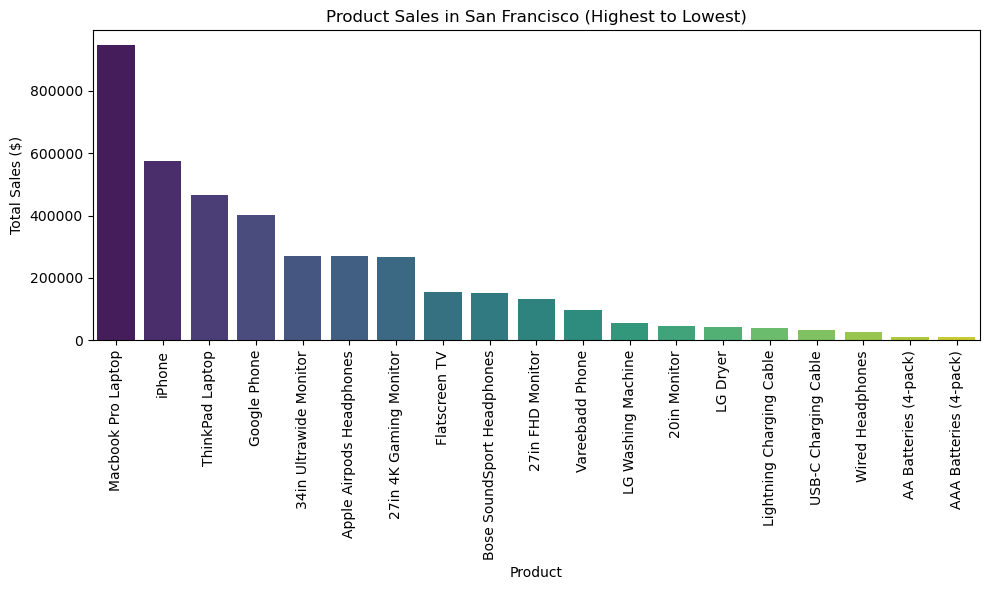

In [69]:
# Filter the data for sales in San Francisco
san_francisco_sales = Final_Sales_2019[Final_Sales_2019['City'] == 'San Francisco']

# Group the data by 'Product' and calculate the total sales for each product
product_sales = san_francisco_sales.groupby('Product')['Total_Sales'].sum().reset_index()

# Sort the data in descending order of total sales
product_sales_sorted = product_sales.sort_values(by='Total_Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales_sorted, x='Product', y='Total_Sales', palette='viridis')

# Update chart layout
plt.title('Product Sales in San Francisco (Highest to Lowest)')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()  # Adjusts layout to avoid label cut-off
plt.show()



#### Comments 

This shows all the products sold in San Francisco. Macbook Pro Laptop is still most sold product.

#### Total Sales by Quantity Ordered

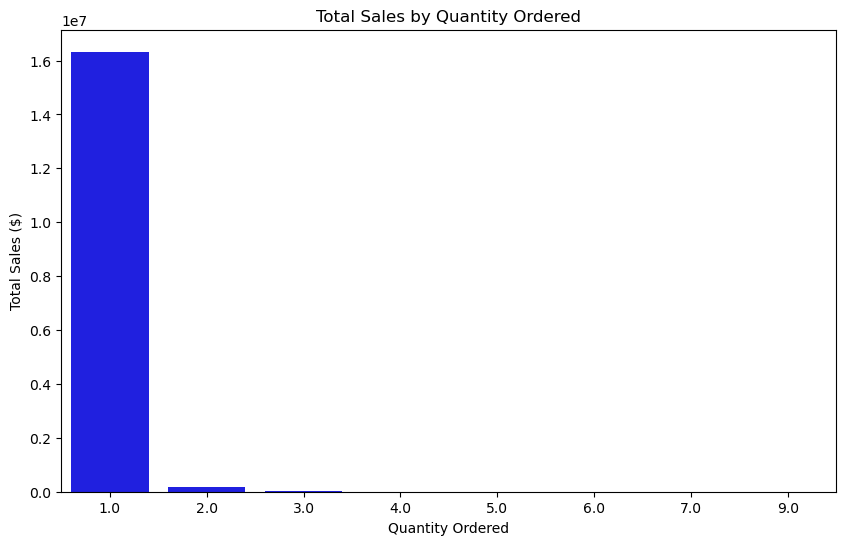

In [70]:
# Group by 'Quantity_Ordered' and sum the 'Total_Sales'
Sales_by_quantity = Final_Sales_2019.groupby('Quantity_Ordered')['Total_Sales'].sum().reset_index()


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales_by_quantity, x='Quantity_Ordered', y='Total_Sales', color='blue')

# Customize the layout
plt.title('Total Sales by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Sales ($)')

# Show the plot
plt.show()


#### Comments
The bar chart visualizes the Total_Sales by Quantity_Ordered, allowing us to compare the sales generated by specific quantitiy. From the chart, we can identify which Quantity 1 the highest and Quantity 9 has lowest sales. 

## Answering Business Questions

#### 1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?

In [71]:
## Revenue Analysis: How much revenue was generated in 2019 from all transactions?

# Total Sales for 2019
Total_Sales_2019 = Final_Sales_2019['Total_Sales'].sum()
print(f"Total Sales Generated in 2019: ${Total_Sales_2019:.2f}")


Total Sales Generated in 2019: $16513908.56


#### 2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

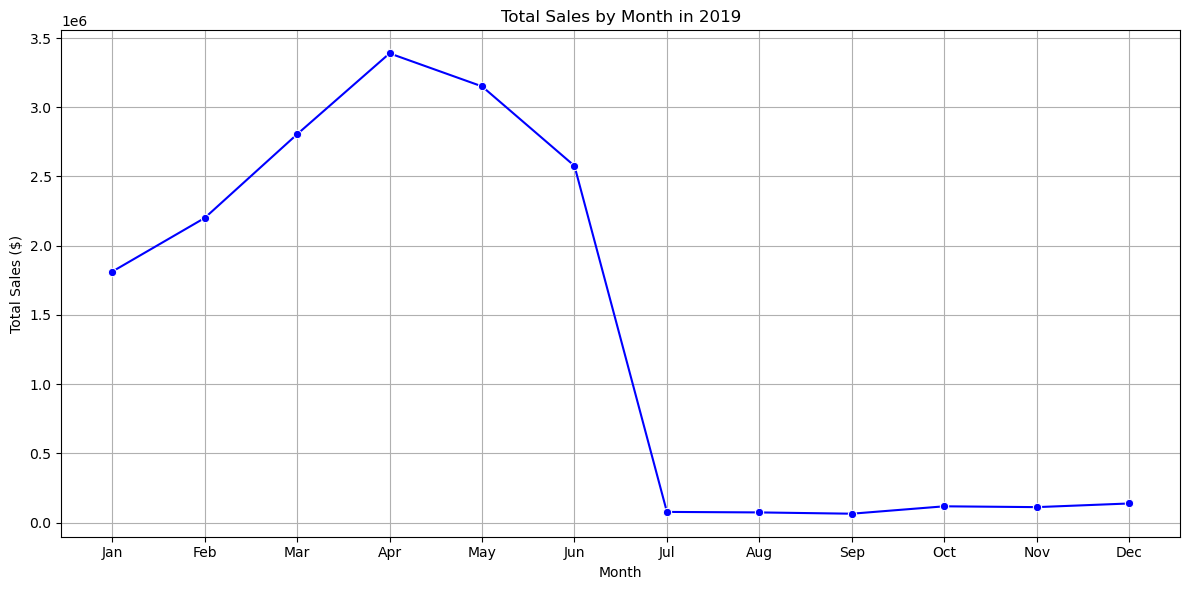

In [72]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Month'] = Final_Sales_2019['Order_Date'].dt.month

# Calculate monthly sales
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# Plot total sales by month using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', color='b')
plt.title('Total Sales by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insights from the Monthly Sales Trend
Overall Sales Trends:
The line chart shows the total sales per month, providing insights into the sales trends over time. From the chart,we can identify any seasonal patterns, trends, or anomalies in the sales data. The sale started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.


#### 3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

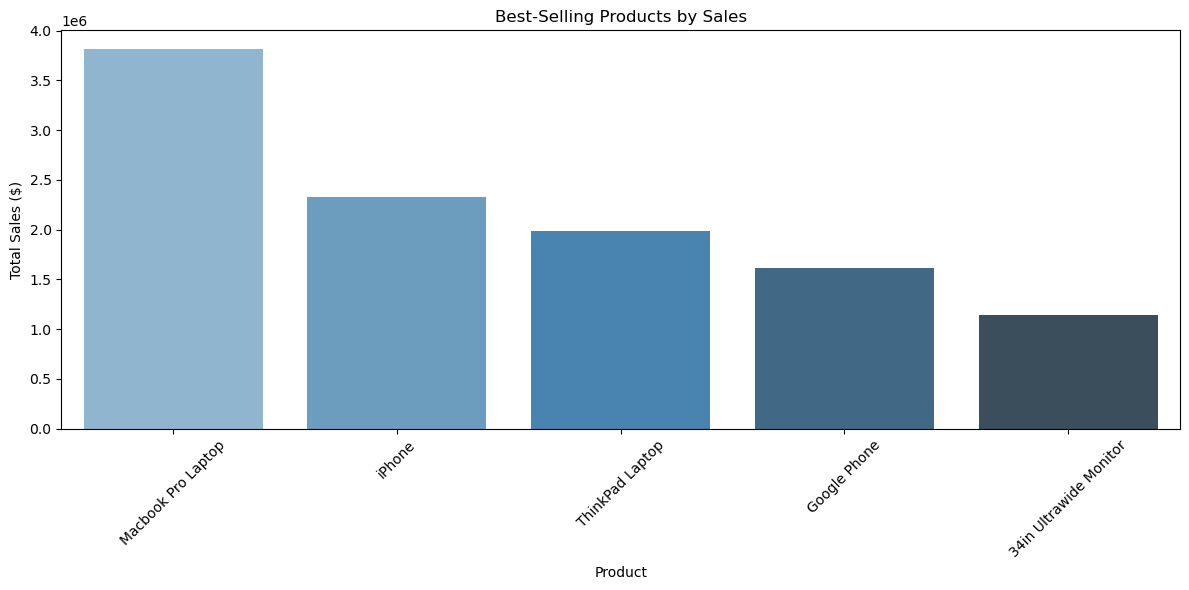

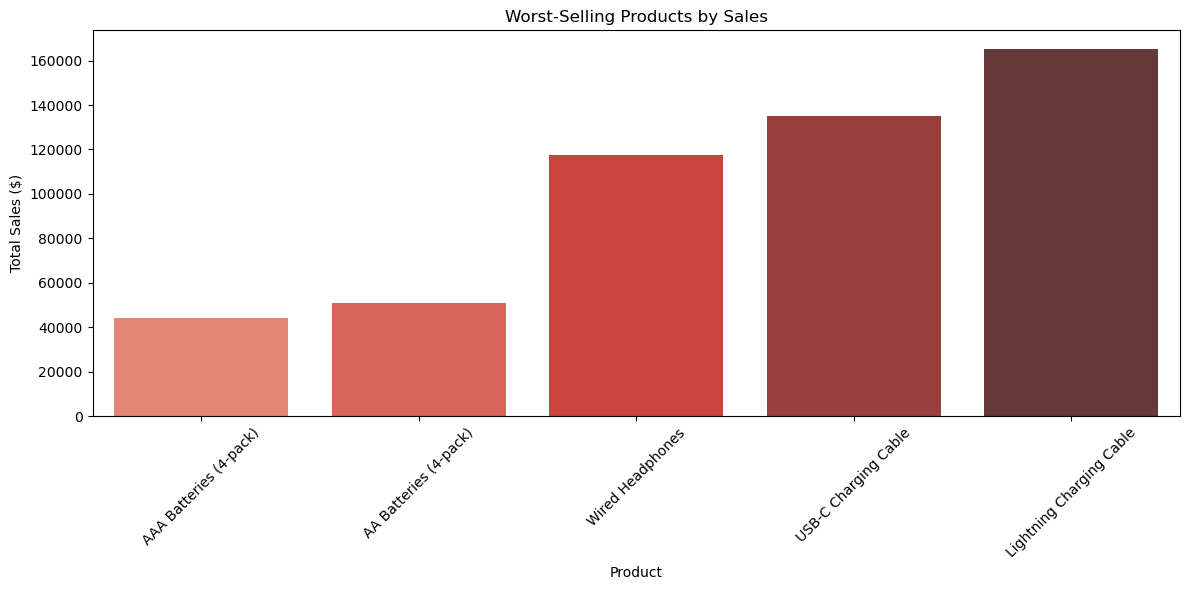

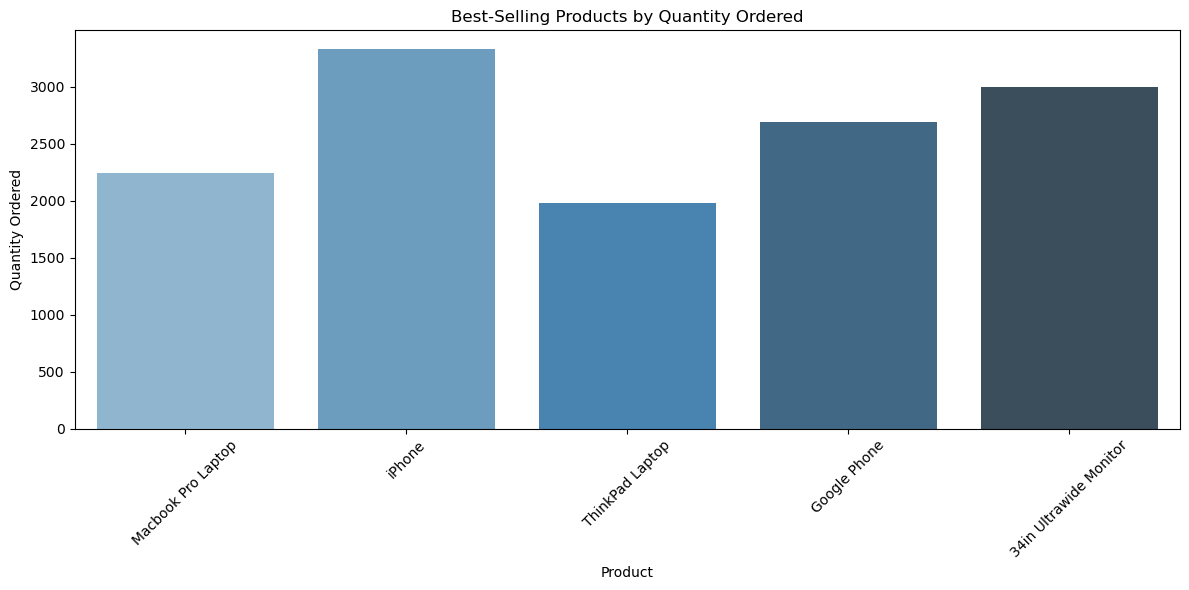

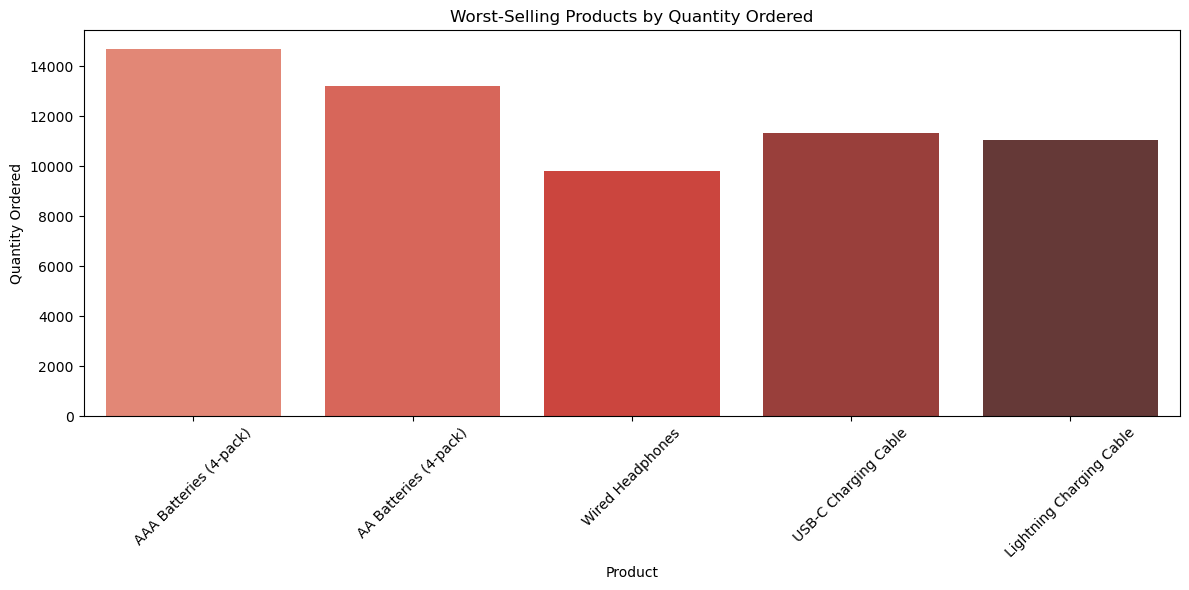

In [73]:

# Group by product and calculate total sales and quantity sold 
product_performance = Final_Sales_2019.groupby('Product')[['Total_Sales', 'Quantity_Ordered']].sum().reset_index()

# Sort products by total revenue and quantity sold
best_selling_products = product_performance.sort_values('Total_Sales', ascending=False).head(5)
worst_selling_products = product_performance.sort_values('Total_Sales', ascending=True).head(5)

# Best-Selling Products by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Total_Sales', data=best_selling_products, palette='Blues_d')
plt.title('Best-Selling Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Worst-Selling Products by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Total_Sales', data=worst_selling_products, palette='Reds_d')
plt.title('Worst-Selling Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Best-Selling Products by Quantity Ordered
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity_Ordered', data=best_selling_products, palette='Blues_d')
plt.title('Best-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Worst-Selling Products by Quantity Ordered
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity_Ordered', data=worst_selling_products, palette='Reds_d')
plt.title('Worst-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Comments

- The best selling product by sales we have Macbook Pro Laptop leading
- The worst selling product by sales ordered we have AAA batteries been the worst.
- The best selling product by quantity ordered we have Macbook Pro Laptop leading
- The worst selling product by quantity ordered we have Lightning Chargining Cable been the worst but it generates more sales.

#### 4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?


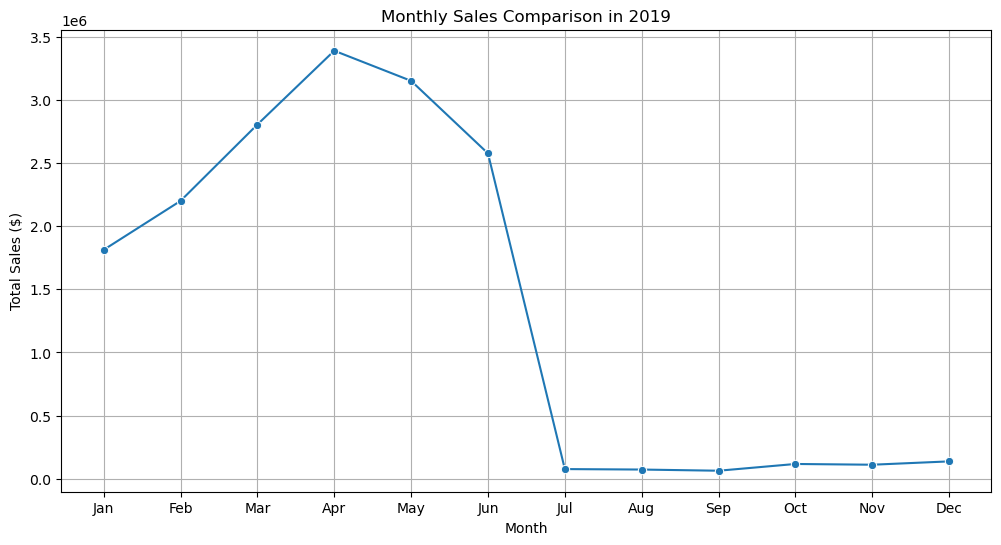

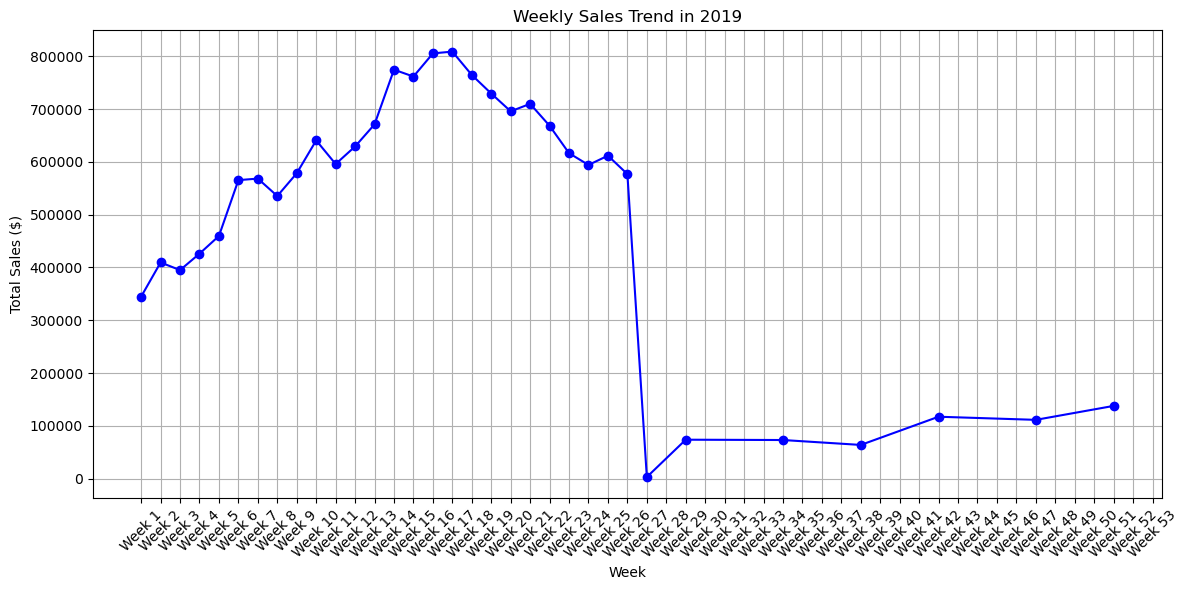

In [74]:
# Plot monthly sales comparison using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', linestyle='-', 
             palette='tab10')
plt.title('Monthly Sales Comparison in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=list(range(1, 13)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Week'] = Final_Sales_2019['Order_Date'].dt.isocalendar().week

# Calculate weekly sales
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Sales'].sum().reset_index()
weekly_sales.columns = ['Week', 'Total_Sales']

# Plot weekly sales trend using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend in 2019')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 54), labels=[f'Week {i}' for i in range(1, 54)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Overall Sales Trends:
The line chart shows the total sales per month, providing insights into the sales trends over time.The sales started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.

In weekly sales trend, the sales increase from week one and gets to the peak at week 16 and 17. It starts declining at week 18 and dips at week 26. Then it start rising slowly at week 29.


#### 5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?

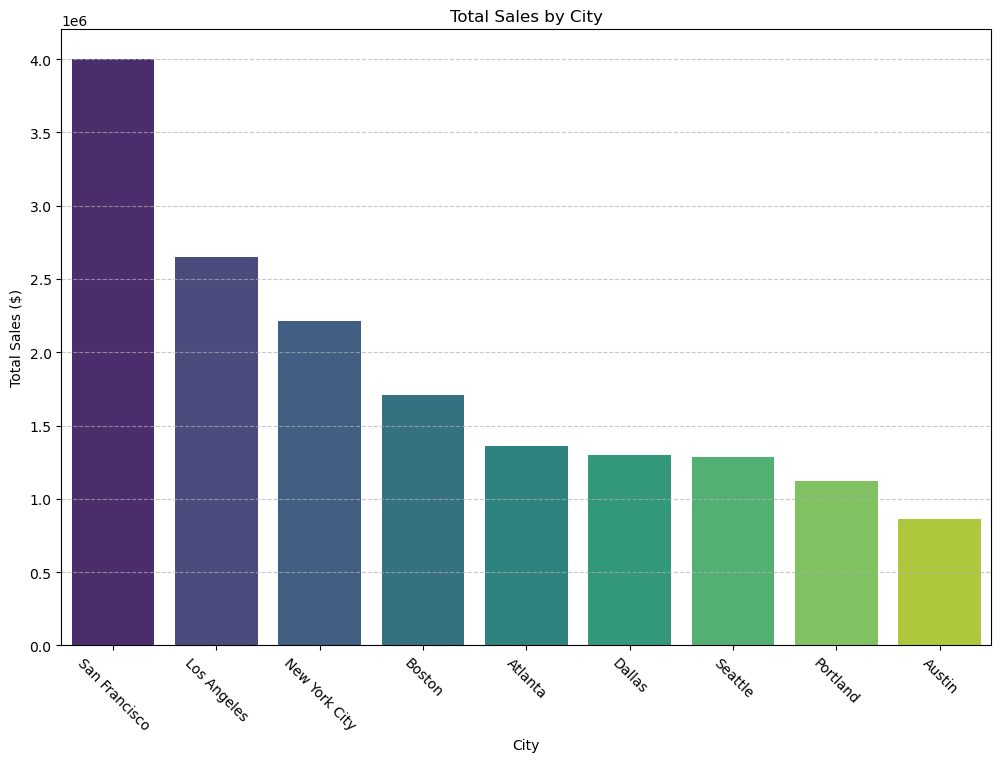

In [75]:
# Group the data by 'City' and calculate the sum of 'Total_Sales' for each city
City = Final_Sales_2019.groupby('City')['Total_Sales'].sum().reset_index()

# Sort the data in descending order of 'Total_Sales'
City = City.sort_values(by='Total_Sales', ascending=False)

# Plot sales by city
plt.figure(figsize=(12, 8))
sns.barplot(data=City, x='City', y='Total_Sales', palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=-45)  # Rotate the city labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 6. Product Level Analysis: How do product level compare in terms of sales generated and quantities sold? Are high-level products driving more sales compared to basic-level products?

Product Level Analysis:
  Product_Level  Total_Sales  Quantity_Ordered
0   Basic-Level   1150552.83           66475.0
1    High-Level  15363355.73           33067.0


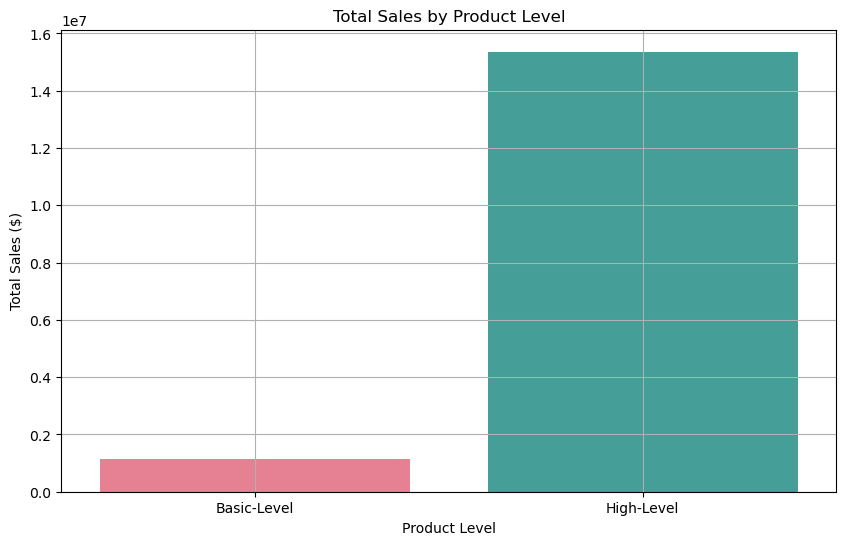

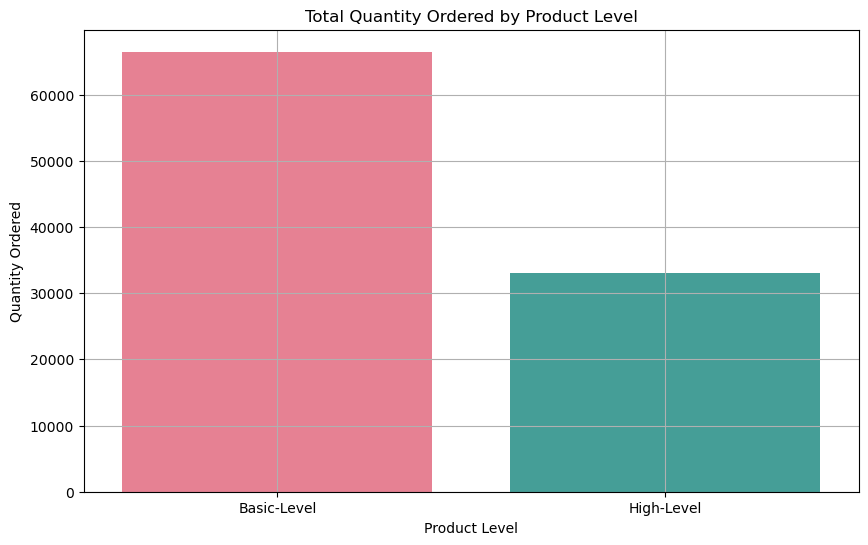

In [76]:

# Group by product level and calculate total sales and quantities sold
Product_Level_Performance = Final_Sales_2019.groupby('Product_Level')[['Total_Sales', 'Quantity_Ordered']].sum().reset_index()

# Print the product category analysis
print("Product Level Analysis:")
print(Product_Level_Performance)

# Plot total sales by product level using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Level', y='Total_Sales', data=Product_Level_Performance, palette='husl')
plt.title('Total Sales by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)  # No rotation for better readability
plt.grid(True)
plt.show()

# Plot quantity ordered by product level using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Level', y='Quantity_Ordered', data=Product_Level_Performance, palette='husl')
plt.title('Total Quantity Ordered by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=0)  # No rotation for better readability
plt.grid(True)
plt.show()


#### Comments
In terms of quantity ordered by the product level, more orders comes from the basic level products but in terms of high level products generates more sales or money

In [77]:
csv_filename='Final_Sales_2019.csv'
Final_Sales_2019.to_csv(csv_filename,index= False)

### Key Insights & Recommendations

1. Capitalize on Seasonal Trends

- Insight: Seasonal patterns show spikes in sales during specific months (likely holiday seasons).

- Recommendation:
Plan promotional campaigns and marketing efforts around peak sales periods to maximize revenue.
Stock up on inventory before high-demand seasons to avoid shortages and meet customer demand effectively.
Offer discounts or bundled deals during slower months to encourage more purchases and stabilize sales across the year.


2. Leverage Best-Selling Products

- Insight: Certain products consistently generate the highest revenue and have higher sales volume.

- Recommendation:
Focus on promoting best-selling products through targeted advertising, promotions, and upselling.
Ensure sufficient inventory of these products to avoid stockouts during peak demand periods.
Identify what features or factors make these products successful and consider extending similar strategies to other product lines.


3. Improve or Phase Out Underperforming Products

- Insight: Worst-selling products generate low revenue and sell in low quantities.

- Recommendation:
Analyze the reasons for poor sales (e.g., high prices, low demand, poor marketing) and try adjusting product positioning, pricing, or promotional efforts.
If there’s no improvement after analysis, consider discontinuing the least popular products to optimize resources and make room for better-selling items.
Offer clearance sales or bundle slow-moving products with popular items to move inventory faster.


4. Target Cities with High Sales Potential

- Insight: Sales vary significantly across cities, with some contributing disproportionately higher revenue.

- Recommendation:
Focus marketing efforts and regional promotions on top-performing cities to further boost sales in those locations.
Explore why certain cities are underperforming and, if possible, create tailored strategies (e.g., localized marketing or region-specific promotions) to stimulate sales.
Allocate more resources (inventory, logistics, etc.) to high-sales regions to improve delivery times and customer satisfaction.

5. Maximize Revenue from Repeat Customers

- Insight: Recurring customers often contribute a substantial portion of sales, and retaining them is more cost-effective than acquiring new ones.

- Recommendation:
Implement a loyalty or rewards program to encourage repeat purchases and increase customer lifetime value.
Use personalized marketing strategies to engage customers based on their past purchasing behavior, offering tailored product recommendations and discounts.
Invest in improving customer satisfaction and reducing churn by ensuring a seamless customer experience, including faster delivery, excellent customer service, and hassle-free returns.



6. Refine Inventory and Supply Chain Management

- Insight: Some months or weeks show irregular sales fluctuations due to unforeseen factors.

- Recommendation:
Use demand forecasting models to ensure optimal inventory levels, particularly for best-selling products during high-demand periods.
Improve supply chain agility to respond faster to sales trends and market shifts, especially in top-performing cities.
Regularly monitor residuals from sales trends to catch any irregularities early and take corrective action (e.g., logistical bottlenecks or unplanned market changes).